# **Visualizaciones más utilizadas**

0) Setup + carga del dataset (Titanic)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Dataset Titanic (viene integrado en seaborn)
df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1) Histogramas (distribución de variables numéricas)

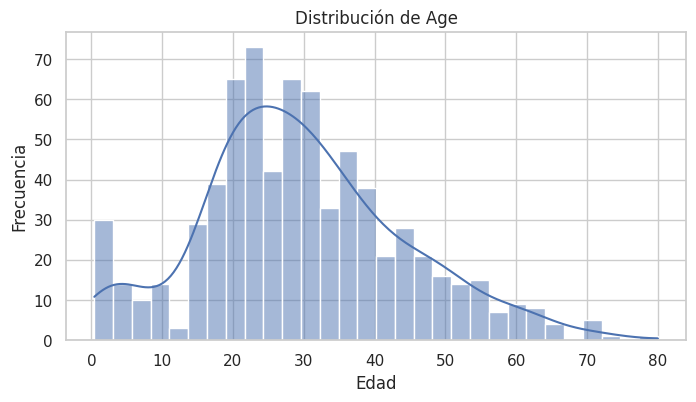

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("Distribución de Age")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Por survived:

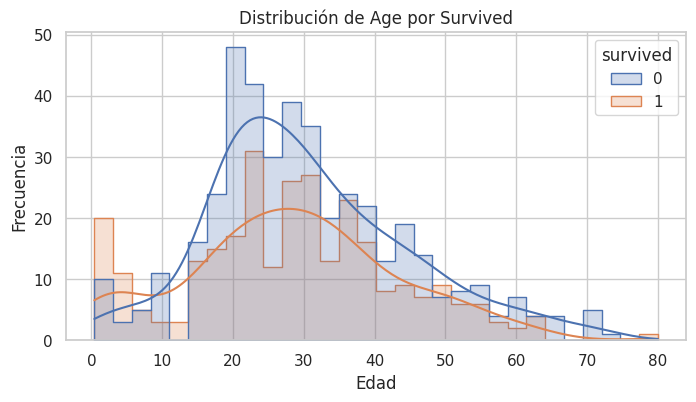

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="age", hue="survived", bins=30, kde=True, element="step")
plt.title("Distribución de Age por Survived")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

2) Diagramas de caja (dispersión + outliers)
Ejemplo: tarifa (fare) por clase (class).

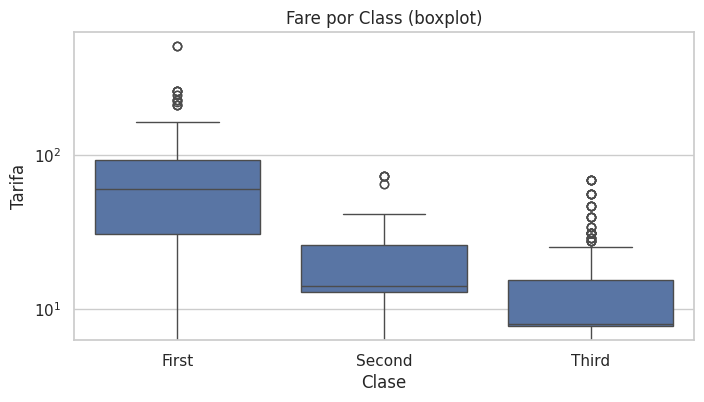

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="class", y="fare")
plt.title("Fare por Class (boxplot)")
plt.xlabel("Clase")
plt.ylabel("Tarifa")
plt.yscale("log")  # opcional: ayuda porque Fare suele estar muy sesgada
plt.show()

3) Gráficos de barras (frecuencias / proporciones)
a) cantidad de sobrevivientes por sexo.

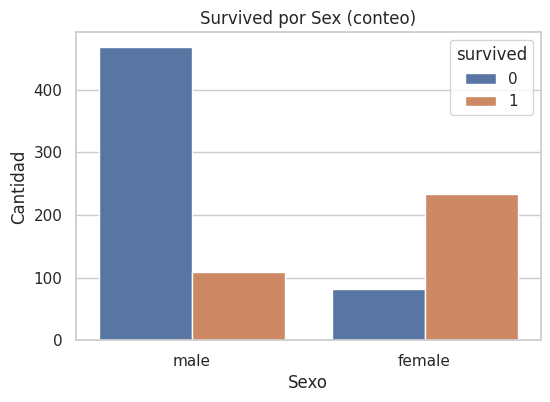

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex", hue="survived")
plt.title("Survived por Sex (conteo)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.show()

Versión en porcentajes (más útil para explicar):

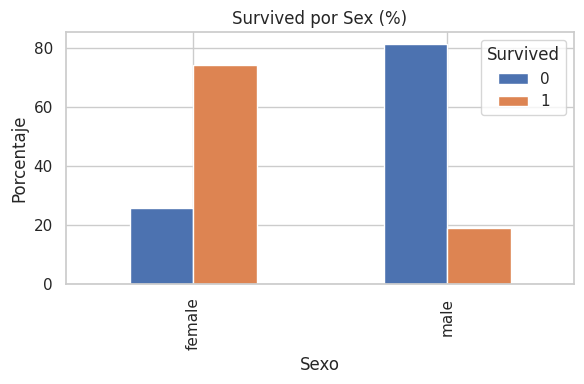

In [ ]:
tab = pd.crosstab(df["sex"], df["survived"], normalize="index") * 100
tab.plot(kind="bar", figsize=(6,4))
plt.title("Survived por Sex (%)")
plt.xlabel("Sexo")
plt.ylabel("Porcentaje")
plt.legend(title="Survived")
plt.tight_layout()
plt.show()

Otras visualizaciones importantes
5) Mapas de calor (correlación)

a) Primero seleccionamos variables numéricas y calculamos correlación.

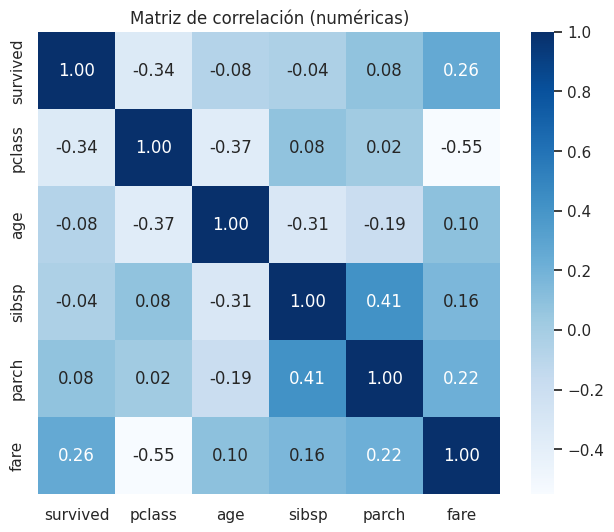

In [ ]:
num_cols = df.select_dtypes(include=["number"]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.title("Matriz de correlación (numéricas)")
plt.show()

6) Diagramas de violín (forma de la distribución por grupo)

a) distribución de age por sobrevivencia

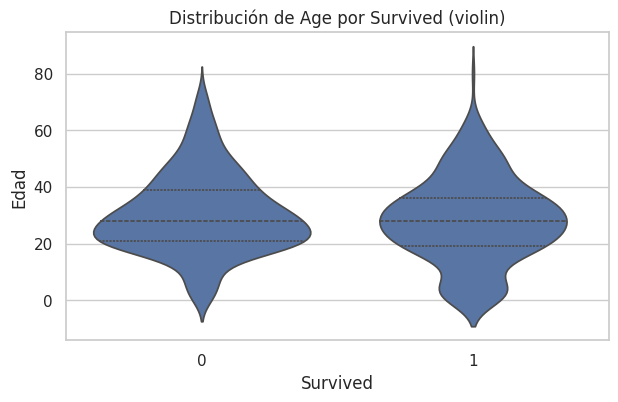

In [ ]:
plt.figure(figsize=(7,4))
sns.violinplot(data=df, x="survived", y="age", inner="quartile")
plt.title("Distribución de Age por Survived (violin)")
plt.xlabel("Survived")
plt.ylabel("Edad")
plt.show()

7) Líneas temporales (series)
a) age en bins, y luego tasa de sobrevivencia por tramo de edad.

/tmp/ipython-input-729463410.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df_tmp.groupby("age_bin")["survived"].mean() * 100


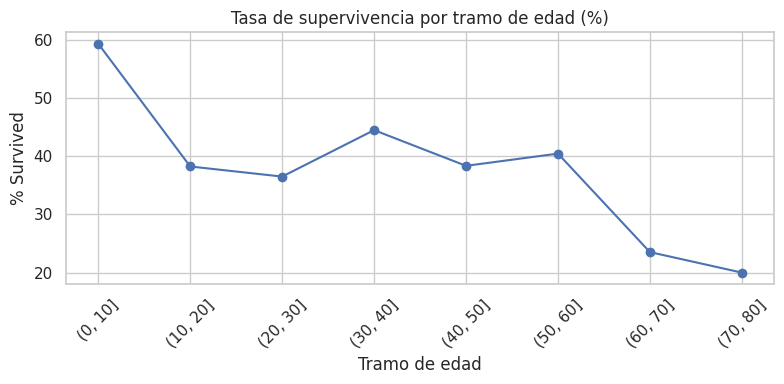

In [ ]:
df_tmp = df.copy()
df_tmp["age_bin"] = pd.cut(df_tmp["age"], bins=[0,10,20,30,40,50,60,70,80])

rate = df_tmp.groupby("age_bin")["survived"].mean() * 100

plt.figure(figsize=(8,4))
rate.plot(marker="o")
plt.title("Tasa de supervivencia por tramo de edad (%)")
plt.xlabel("Tramo de edad")
plt.ylabel("% Survived")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8) Matriz de pares (pairplot) – multivariado rápido

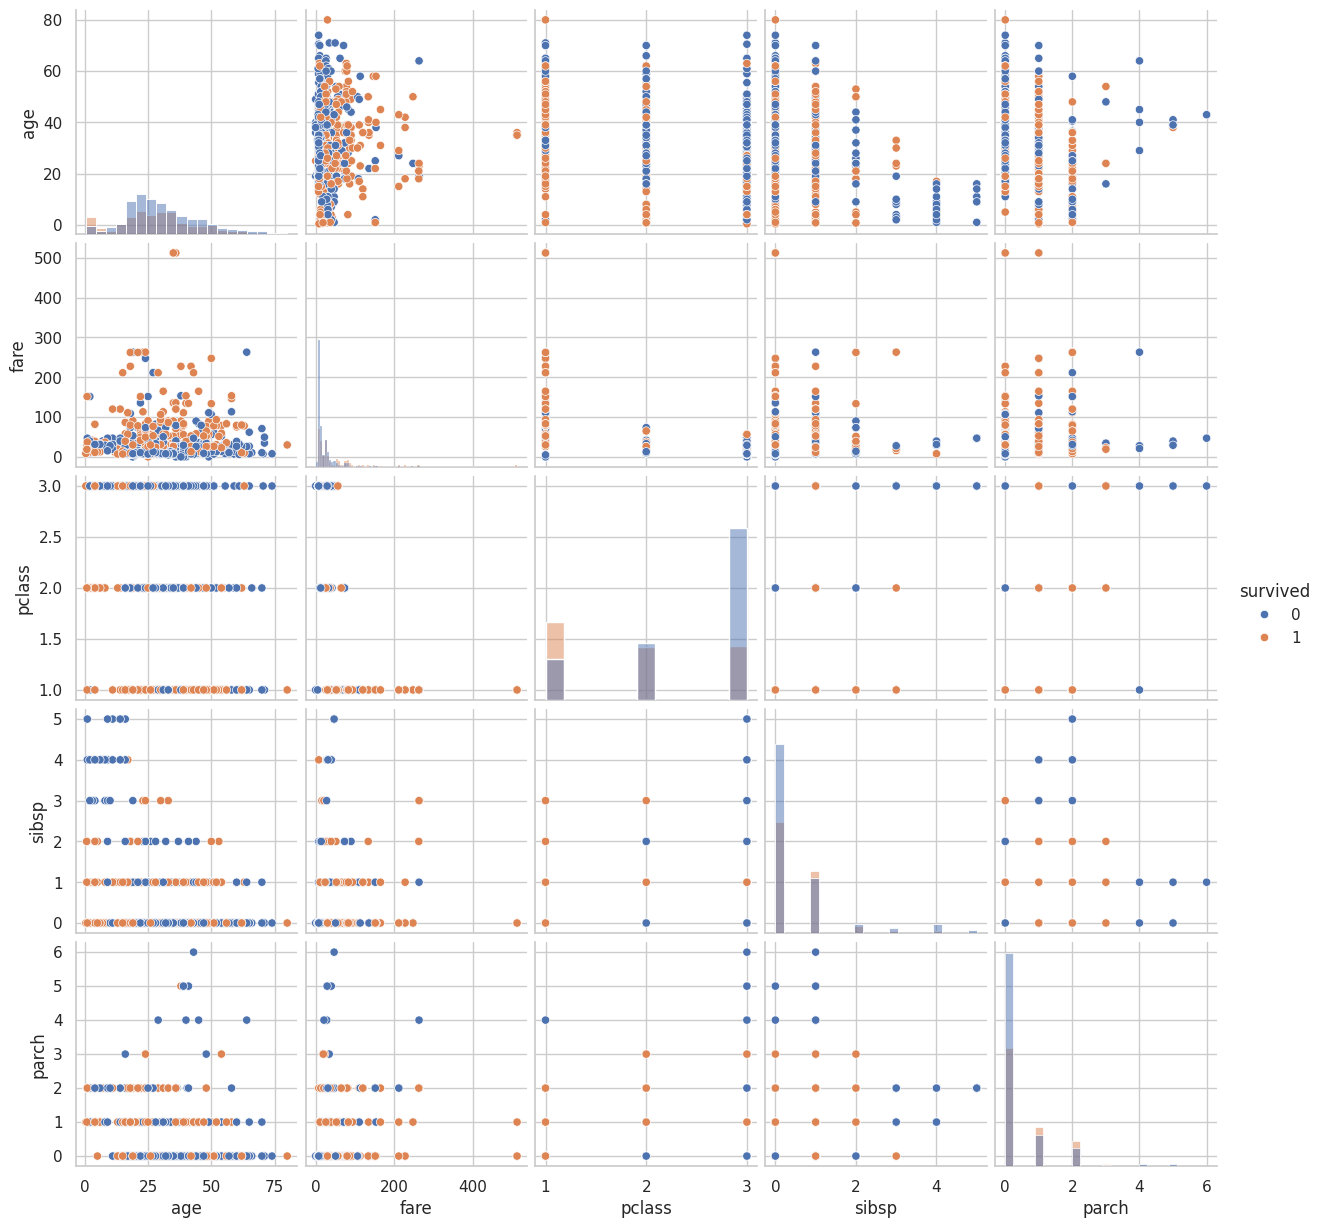

In [ ]:
cols = ["survived", "age", "fare", "pclass", "sibsp", "parch"]
sns.pairplot(df[cols].dropna(), hue="survived", diag_kind="hist")
plt.show()